<a href="https://colab.research.google.com/github/LEOFRANKLIN2003/Fake-News-Detection/blob/main/FND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction. text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools


In [ ]:
import numpy as np


In [ ]:
df=pd.read_csv("fake_or_real_news.csv")

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df = df.set_index('Unnamed: 0')

In [ ]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
y = df.label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)


In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
print(X_train)

Unnamed: 0
8476     Daniel Greenfield, a Shillman Journalism Fello...
10294    Google Pinterest Digg Linkedin Reddit Stumbleu...
3608     U.S. Secretary of State John F. Kerry said Mon...
10142    — Kaydee King (@KaydeeKing) November 9, 2016 T...
875      It's primary day in New York and front-runners...
                               ...                        
4490     The State Department told the Republican Natio...
8062     The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622      Anti-Trump Protesters Are Tools of the Oligar...
4021     ADDIS ABABA, Ethiopia —President Obama convene...
4330     Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object


In [ ]:
print(count_test)

  (0, 2839)	1
  (0, 3767)	1
  (0, 4807)	1
  (0, 5804)	1
  (0, 6448)	2
  (0, 8787)	1
  (0, 8834)	1
  (0, 8878)	1
  (0, 12486)	1
  (0, 12654)	2
  (0, 13020)	1
  (0, 13021)	2
  (0, 14667)	1
  (0, 14825)	1
  (0, 15717)	1
  (0, 16645)	1
  (0, 16966)	1
  (0, 17455)	1
  (0, 17713)	1
  (0, 17934)	1
  (0, 18524)	1
  (0, 18598)	1
  (0, 18684)	2
  (0, 18783)	4
  (0, 19459)	1
  :	:
  (2090, 61567)	1
  (2090, 61586)	2
  (2090, 61654)	3
  (2090, 61780)	1
  (2090, 62224)	1
  (2090, 62531)	2
  (2090, 62561)	1
  (2090, 62982)	1
  (2090, 63343)	1
  (2090, 63565)	4
  (2090, 63950)	1
  (2090, 64005)	1
  (2090, 64268)	2
  (2090, 64569)	5
  (2090, 64629)	1
  (2090, 64681)	1
  (2090, 64774)	3
  (2090, 64812)	1
  (2090, 64917)	2
  (2090, 65750)	1
  (2090, 65921)	2
  (2090, 65932)	1
  (2090, 66029)	1
  (2090, 66450)	1
  (2090, 66847)	1


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print()

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(count_train, y_train)

MultinomialNB()

accuracy:   0.893



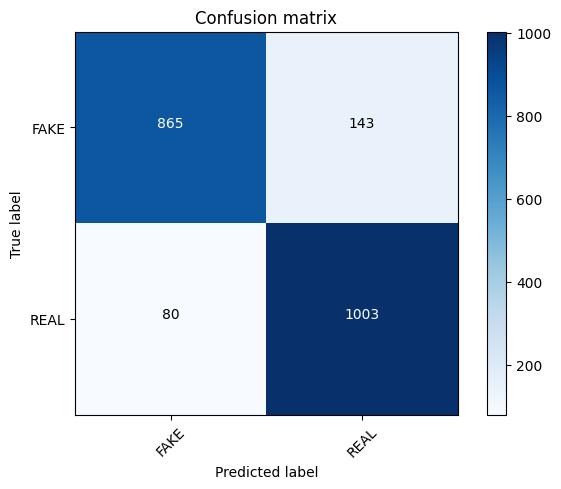

In [ ]:
pred = model.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
pac= PassiveAggressiveClassifier(max_iter=50)

In [ ]:
tfidf_vectorizer.get_feature_names_out()[-10:]

array(['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى',
       'ยงade'], dtype=object)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.935



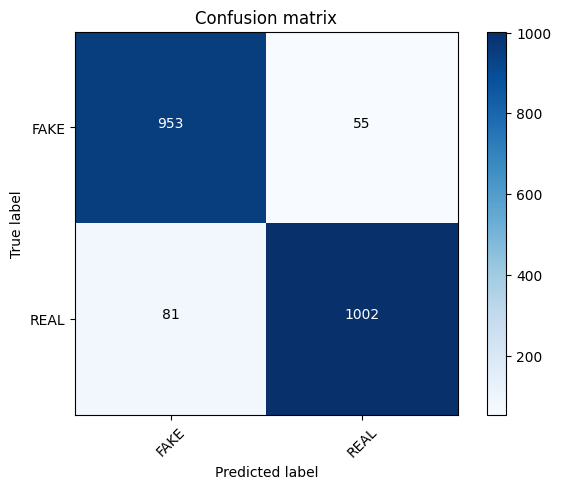

In [ ]:
pred = pac.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Main Program


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=20)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
model.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
voting_classifier = VotingClassifier(estimators=[('nb', model), ('pac', pac)], voting='hard')

In [ ]:
voting_classifier.fit(tfidf_train, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('pac', PassiveAggressiveClassifier(max_iter=50))])

In [ ]:
y_pred = voting_classifier.predict(tfidf_test)

Accuracy: 0.9471191791633781



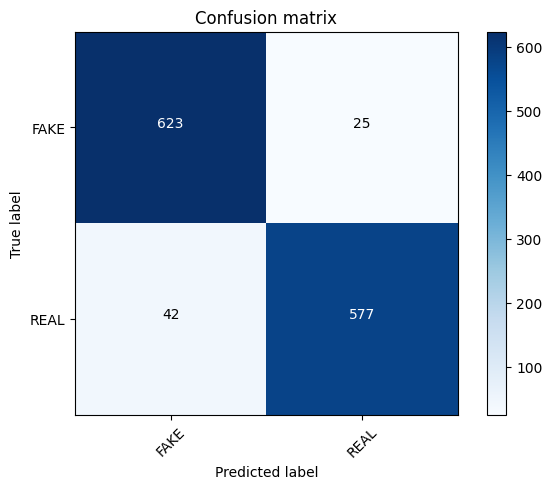

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = metrics.confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
def predict_fake_news(news_text):
    # Transform input text using tfidf vectorizer
    tfidf_input = tfidf_vectorizer.transform([news_text])

    # Predict using the voting classifier
    prediction = voting_classifier.predict(tfidf_input)

    return prediction[0]

In [ ]:
input_text = input("Enter the news text: ")
prediction = predict_fake_news(input_text)
print("Prediction:", prediction)

Enter the news text: U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.  Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.  The visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.  The French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing 